<a href="https://colab.research.google.com/github/DanielChoi0711/Ash/blob/main/Network_Intrusion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn

#Ignore Warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/2025 UTS Autumn Session/41180 Data Analytics for CyberSecurity/Assessment 3/Train_data.csv')
test = pd.read_csv('/content/drive/MyDrive/2025 UTS Autumn Session/41180 Data Analytics for CyberSecurity/Assessment 3/Test_data.csv')

In [ ]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [ ]:
test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,tcp,http,SF,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


In [ ]:
train['num_outbound_cmds'].value_counts()
test['num_outbound_cmds'].value_counts()

,count
num_outbound_cmds,
0,22544


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical

# 1. 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/2025 UTS Autumn Session/41180 Data Analytics for CyberSecurity/Assessment 3/Train_data.csv')

# Label Encoding
categorical_cols = ['protocol_type', 'service', 'flag']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Target Encoding
target_encoder = LabelEncoder()
df['class'] = target_encoder.fit_transform(df['class'])

# Feature/Target split
X = df.drop('class', axis=1)
y = df['class']

# Feature Nomalisation
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# reshape: (samples, time_steps=1, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Target One-Hot
y_onehot = to_categorical(y)

# Train/Test Split
X_train, X_val, y_train, y_val = train_test_split(
    X_reshaped, y_onehot, test_size=0.2, random_state=42, stratify=y
)

# Model Architecture (Definition)
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_scaled.shape[1])))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 10. Machine Learning
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# 11. 평가
loss, acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {acc:.4f}")

Epoch 1/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9126 - loss: 0.2856 - val_accuracy: 0.9617 - val_loss: 0.1101
Epoch 2/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9627 - loss: 0.1094 - val_accuracy: 0.9667 - val_loss: 0.0916
Epoch 3/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9671 - loss: 0.0929 - val_accuracy: 0.9667 - val_loss: 0.0854
Epoch 4/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9693 - loss: 0.0819 - val_accuracy: 0.9702 - val_loss: 0.0785
Epoch 5/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9720 - loss: 0.0761 - val_accuracy: 0.9732 - val_loss: 0.0714
Epoch 6/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9721 - loss: 0.0747 - val_accuracy: 0.9754 - val_loss: 0.0670
Epoch 7/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9738 - loss: 0.0681 - val_accuracy: 0.9764 - val_loss: 0.0636
Epoch 8/10
630/630 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9728 - loss: 0.0689 - val_accuracy: 0.

In [ ]:
print(target_encoder.classes_)  # ['anomaly', 'normal'] or ['normal', 'anomaly']

['anomaly' 'normal']


158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


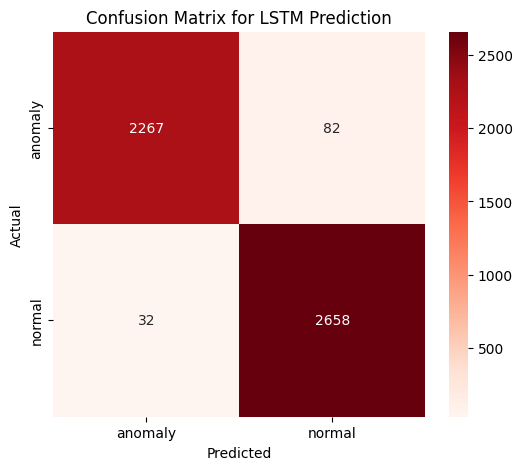

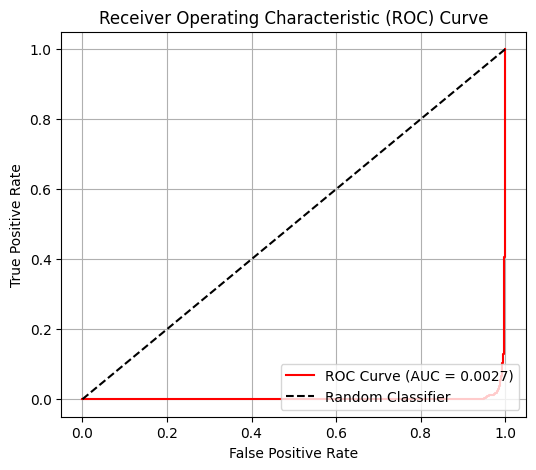

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 1. 예측 결과 (확률로)
y_pred_proba = model.predict(X_val)

# 2. 예측 결과 (클래스 label)
y_pred_class = np.argmax(y_pred_proba, axis=1)
y_true_class = np.argmax(y_val, axis=1)

# === Confusion Matrix ===
cm = confusion_matrix(y_true_class, y_pred_class)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['anomaly', 'normal'],
            yticklabels=['anomaly', 'normal'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for LSTM Prediction')
plt.show()

# === ROC Curve ===
fpr, tpr, thresholds = roc_curve(y_true_class, y_pred_proba[:, 0])  # anomaly 확률 사용
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='Red')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import f1_score

# Prediction Class (Integer)
y_pred_class = np.argmax(y_pred_proba, axis=1)
y_true_class = np.argmax(y_val, axis=1)

# F1 score (binary or multi-class)
f1 = f1_score(y_true_class, y_pred_class, average='binary', pos_label=0)  # anomaly 클래스 기준

print(f"F1 Score (anomaly class): {f1:.4f}")

F1 Score (anomaly class): 0.9755


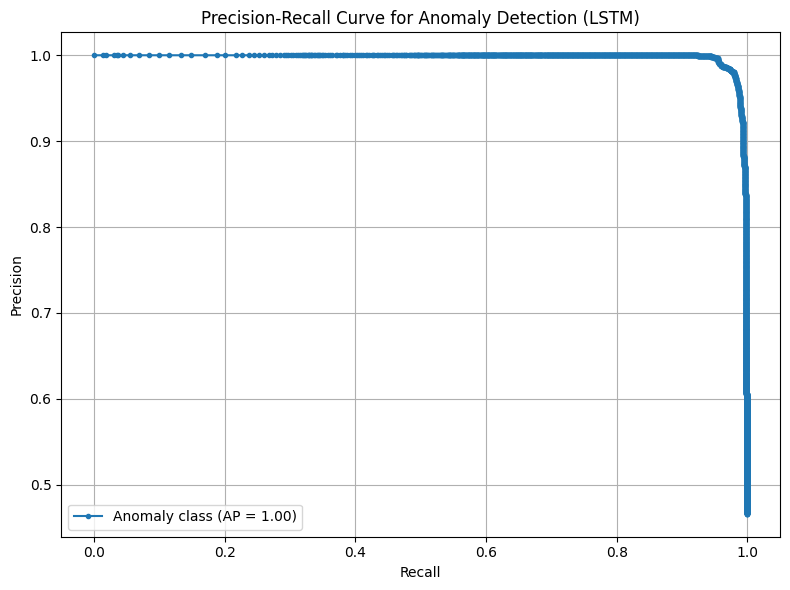

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve, average_precision_score

# 실제 클래스와 anomaly class(0)에 대한 예측 확률
y_true_class = np.argmax(y_val, axis=1)
y_scores_anomaly = y_pred_proba[:, 0]  # anomaly class 확률

# Precision-Recall Curve 계산
precision, recall, thresholds = precision_recall_curve(y_true_class, y_scores_anomaly, pos_label=0)
avg_precision = average_precision_score(y_true_class, y_scores_anomaly, pos_label=0)

# 시각화
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Anomaly class (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Anomaly Detection (LSTM)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()